### Introduction

This notebook records the experiments I have done in the article of "Computing Semantic Similarity of Concepts in Knowledge Graphs". If someone is interested in reproducing the experiments, one can install Sematch and use this notebook for reference.

In [45]:
from sematch.semantic.similarity import WordNetSimilarity
from gensim.models import Word2Vec, KeyedVectors
from nltk.corpus import brown, treebank
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [5]:
word2vec_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [29]:
glove_model = KeyedVectors.load_word2vec_format('./glove.840B.300d.w2vformat.txt', binary=False)

### A simple example of word similarity

In [6]:
wns = WordNetSimilarity()
words = ['artist', 'musician', 'scientist', 'physicist', 'actor', 'movie']
sim_matrix = [[wns.word_similarity(w1, w2, 'wpath') for w1 in words] for w2 in words]
df = pd.DataFrame(sim_matrix, index=words,columns=words)
display(df)

,artist,musician,scientist,physicist,actor,movie
artist,1.000000,0.809924,0.359417,0.296175,0.359417,0.135239
musician,0.809924,1.000000,0.296175,0.251859,0.641697,0.123384
scientist,0.359417,0.296175,1.000000,0.790743,0.456999,0.149615
physicist,0.296175,0.251859,0.790743,1.000000,0.359417,0.135239
actor,0.359417,0.641697,0.456999,0.359417,1.000000,0.149615
movie,0.135239,0.123384,0.149615,0.135239,0.149615,1.000000


### Evaluations on Word Similarity Datasets

We have collected some well known word similarity datasets for evaluating semantic similarity metrics. Several python classes can be used to separate the dataset for specicial purpose and evaluate the metric function automatically. 

We put them together and provide a uniformed framework to evaluate different semantic measures. The word similarity datasets include:

- [Rubenstein and Goodenough (RG)](http://www.cs.cmu.edu/~mfaruqui/word-sim/EN-RG-65.txt) 

Herbert Rubenstein and John B. Goodenough. 1965. Contextual correlates of synonymy. Commun. ACM 8, 10 (October 1965), 627-633. DOI=10.1145/365628.365657 

- [Miller and Charles (MC)](http://www.cs.cmu.edu/~mfaruqui/word-sim/EN-MC-30.txt) 

Miller, George A., and Walter G. Charles. "Contextual correlates of semantic similarity." Language and cognitive processes 6.1 (1991): 1-28.

- [Wordsim353 (WS353)](http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/) 

Lev Finkelstein, Evgeniy Gabrilovich, Yossi Matias, Ehud Rivlin, Zach Solan, Gadi Wolfman, and Eytan Ruppin, "Placing Search in Context: The Concept Revisited", ACM Transactions on Information Systems, 20(1):116-131, January 2002 

- [wordsim353 similarity and relatedness (WS353Sim)](http://alfonseca.org/eng/research/wordsim353.html) 

Eneko Agirre, Enrique Alfonseca, Keith Hall, Jana Kravalova, Marius Pasca, Aitor Soroa, A Study on Similarity and Relatedness Using Distributional and WordNet-based Approaches, In Proceedings of NAACL-HLT 2009.

- [SimLex-999 (SIMLEX)](http://www.cl.cam.ac.uk/~fh295/simlex.html) 

SimLex-999: Evaluating Semantic Models with (Genuine) Similarity Estimation. 2014. Felix Hill, Roi Reichart and Anna Korhonen. Preprint pubslished on arXiv. arXiv:1408.3456


In [7]:
from sematch.evaluation import WordSimEvaluation
from sematch.semantic.similarity import WordNetSimilarity, YagoTypeSimilarity
from nltk.corpus import wordnet as wn

data_word_noun = ['noun_rg','noun_mc','noun_ws353','noun_ws353-sim','noun_simlex']
data_word_graph = ['graph_rg','graph_mc','graph_ws353','graph_ws353-sim','graph_simlex']
data_word_type = ['type_rg','type_mc','type_ws353','type_ws353-sim','type_simlex']

sim_methods_noun = ['path','lch','wup','li','res','lin','jcn','wpath']
sim_methods_graph = ['path','lch','wup','li','res','res_graph','lin','jcn','wpath','wpath_graph']
sim_methods_type = ['path','lch','wup','li','res','res_graph','lin','lin_graph','jcn','jcn_graph','wpath','wpath_graph']

ws_eval = WordSimEvaluation()
wns = WordNetSimilarity()
yagosim = YagoTypeSimilarity()

To produce the TABLE 2 in the article "The illustration of Semantic Similarity Methods on Some Concept Pair Examples". We manually create the word to synset mapping and compute their semantic similarity scores using different semantic similarity metrics.

In [8]:
aspects = {'beef':wn.synset('beef.n.02'), 'lamb':wn.synset('lamb.n.05'), 'octopus':wn.synset('octopus.n.01'),
          'shellfish':wn.synset('shellfish.n.01'), 'meat':wn.synset('meat.n.01'), 'seafood':wn.synset('seafood.n.01'),
          'food':wn.synset('food.n.02'), 'service':wn.synset('service.n.02'),'atmosphere':wn.synset('atmosphere.n.01'),
          'coffee':wn.synset('coffee.n.01')}
aspect_pairs = [('beef', 'octopus'), ('beef', 'lamb'), ('meat','seafood'), ('octopus', 'shellfish'),
               ('beef','service'),('beef','atmosphere'),('beef', 'coffee'), ('food','coffee')]
aspects_sim_matrix = [[wns.similarity(aspects[w1], aspects[w2], m) for m in sim_methods_noun] 
                      for w1, w2 in aspect_pairs]
aspect_index = [x+'-'+y for x, y in aspect_pairs]
aspect_df = pd.DataFrame(aspects_sim_matrix, index=aspect_index, columns=sim_methods_noun)
display(aspect_df)

,path,lch,wup,li,res,lin,jcn,wpath
beef-octopus,0.200000,2.028148,0.714286,0.441994,6.109280,0.484051,0.071308,0.494238
beef-lamb,0.333333,2.538974,0.857143,0.667005,6.725370,0.591049,0.097025,0.691593
meat-seafood,0.333333,2.538974,0.833333,0.659377,6.109280,0.759623,0.205488,0.661525
octopus-shellfish,0.333333,2.538974,0.857143,0.667005,9.359654,0.729141,0.125726,0.801453
beef-service,0.071429,0.998529,0.133333,0.000000,0.000000,0.000000,0.049523,0.071429
beef-atmosphere,0.083333,1.152680,0.153846,0.000000,0.000000,0.000000,0.052383,0.083333
beef-coffee,0.111111,1.440362,0.428571,0.168312,3.336706,0.319125,0.065625,0.208354
food-coffee,0.142857,1.691676,0.500000,0.251092,3.336706,0.410819,0.094601,0.259764


#### WPATH method with different K in Word Noun Datasets

The data_word_noun contains word pairs that can be mapped to WordNet noun taxonomy. The k settings are varied with interval 0.1 started from 0.1.

In [9]:
wpath_cors = [ws_eval.evaluate_wpath_k(dataset) for _, dataset in enumerate(data_word_noun)]
cors_matrix = [[cors[i] for _, cors in enumerate(wpath_cors)] for i in range(1,11)]
wpath_index = list(map(lambda x: str(x/10.0), range(1, 11)))
df_wpath = pd.DataFrame(cors_matrix, index=wpath_index, columns=data_word_noun)
display(df_wpath)

,noun_rg,noun_mc,noun_ws353,noun_ws353-sim,noun_simlex
0.1,0.747,0.703,0.278,0.535,0.486
0.2,0.746,0.696,0.324,0.616,0.497
0.3,0.776,0.737,0.343,0.635,0.550
0.4,0.785,0.740,0.347,0.643,0.573
0.5,0.790,0.738,0.347,0.644,0.582
0.6,0.789,0.732,0.345,0.642,0.589
0.7,0.791,0.723,0.345,0.644,0.596
0.8,0.794,0.728,0.341,0.645,0.603
0.9,0.795,0.726,0.332,0.636,0.601
1.0,0.781,0.724,0.310,0.609,0.584


#### WPATH method with different K in Word Graph Datasets

In word graph dataset, we performed the evaluation of wpath with different k using corpus-based IC and graph-based IC respectively.

In [10]:
#evaluate with corpus-based IC
wpath_cors = [ws_eval.evaluate_wpath_k(dataset) for _, dataset in enumerate(data_word_graph)]
cors_matrix = [[cors[i] for _, cors in enumerate(wpath_cors)] for i in range(1,11)]
df_wpath_graph = pd.DataFrame(cors_matrix, index=wpath_index, columns=data_word_graph)
display(df_wpath_graph)

,graph_rg,graph_mc,graph_ws353,graph_ws353-sim,graph_simlex
0.1,0.734,0.673,0.286,0.512,0.479
0.2,0.732,0.664,0.340,0.604,0.490
0.3,0.769,0.711,0.361,0.625,0.546
0.4,0.780,0.714,0.366,0.634,0.569
0.5,0.786,0.714,0.366,0.636,0.579
0.6,0.786,0.708,0.365,0.634,0.586
0.7,0.789,0.696,0.367,0.636,0.593
0.8,0.794,0.703,0.364,0.639,0.600
0.9,0.796,0.700,0.354,0.631,0.599
1.0,0.782,0.699,0.331,0.602,0.581


In [11]:
#evaluate with graph-based IC
wpath_cors = [ws_eval.evaluate_wpath_k(dataset, 'graph') for _, dataset in enumerate(data_word_graph)]
cors_matrix = [[cors[i] for _, cors in enumerate(wpath_cors)] for i in range(1,11)]
df_wpath_graph = pd.DataFrame(cors_matrix, index=wpath_index, columns=data_word_graph)
display(df_wpath_graph)

,graph_rg,graph_mc,graph_ws353,graph_ws353-sim,graph_simlex
0.1,0.707,0.687,0.161,0.385,0.375
0.2,0.729,0.722,0.249,0.474,0.404
0.3,0.736,0.742,0.301,0.545,0.436
0.4,0.757,0.757,0.313,0.566,0.468
0.5,0.774,0.754,0.320,0.573,0.479
0.6,0.781,0.761,0.327,0.588,0.501
0.7,0.781,0.725,0.330,0.591,0.519
0.8,0.778,0.712,0.332,0.599,0.542
0.9,0.794,0.716,0.339,0.616,0.571
1.0,0.782,0.699,0.331,0.602,0.581


#### WPATH method with different K in Word Type Datasets

In [12]:
#evaluate with corpus-based IC
wpath_cors = [ws_eval.evaluate_wpath_k(dataset) for _, dataset in enumerate(data_word_type)]
cors_matrix = [[cors[i] for _, cors in enumerate(wpath_cors)] for i in range(1,11)]
df_wpath_type = pd.DataFrame(cors_matrix, index=wpath_index, columns=data_word_type)
display(df_wpath_type)

,type_rg,type_mc,type_ws353,type_ws353-sim,type_simlex
0.1,0.632,0.608,0.280,0.478,0.482
0.2,0.632,0.584,0.327,0.563,0.503
0.3,0.672,0.659,0.357,0.595,0.556
0.4,0.683,0.646,0.361,0.600,0.582
0.5,0.689,0.669,0.363,0.602,0.594
0.6,0.688,0.667,0.363,0.598,0.603
0.7,0.688,0.638,0.367,0.602,0.613
0.8,0.691,0.627,0.365,0.606,0.621
0.9,0.689,0.620,0.359,0.606,0.625
1.0,0.679,0.621,0.353,0.601,0.616


In [13]:
#evaluate with graph-based IC
wpath_cors = [ws_eval.evaluate_wpath_k(dataset, 'graph') for _, dataset in enumerate(data_word_type)]
cors_matrix = [[cors[i] for _, cors in enumerate(wpath_cors)] for i in range(1,11)]
df_wpath_type = pd.DataFrame(cors_matrix, index=wpath_index, columns=data_word_type)
display(df_wpath_type)

,type_rg,type_mc,type_ws353,type_ws353-sim,type_simlex
0.1,0.653,0.670,0.175,0.398,0.387
0.2,0.692,0.726,0.248,0.436,0.431
0.3,0.696,0.729,0.304,0.504,0.477
0.4,0.698,0.729,0.308,0.521,0.512
0.5,0.713,0.759,0.318,0.529,0.527
0.6,0.714,0.766,0.327,0.546,0.550
0.7,0.703,0.732,0.331,0.553,0.567
0.8,0.687,0.709,0.334,0.565,0.589
0.9,0.692,0.656,0.343,0.585,0.611
1.0,0.679,0.621,0.353,0.601,0.616


#### Baseline semantic similarity metrics on Word Noun Datasets

In [30]:
path = lambda x, y: wns.word_similarity(x, y, 'path')
lch = lambda x, y: wns.word_similarity(x, y, 'lch')
wup = lambda x, y: wns.word_similarity(x, y, 'wup')
li = lambda x, y: wns.word_similarity(x, y, 'li')
res = lambda x, y: wns.word_similarity(x, y, 'res')
lin = lambda x, y: wns.word_similarity(x, y, 'lin')
jcn = lambda x, y: wns.word_similarity(x, y, 'jcn')
miss_values = []
total = 0
def word2vec(x, y):
    ans = 0
    try:
        ans = word2vec_model.wv.similarity(x, y)
    except KeyError:
        pass
    return ans

def glove(x, y):
    global miss_values, total
    total += 1
    ans = 0
    try:
        ans = glove_model.wv.similarity(x, y)
    except KeyError:
        miss_values.append((x, y))
    return ans

methods = {'path':path, 'lch':lch, 'wup':wup, 'li':li, 'res':res, 'lin':lin, 'jcn':jcn, 'word2vec': word2vec, 'glove': glove}
cor_dicts = [ws_eval.evaluate_multiple_metrics(methods, dataset) for dataset in data_word_noun]
baseline_cors_matrix = [[cors[m] for _, cors in enumerate(cor_dicts)] for m in sim_methods_noun[0:7] + ['word2vec', 'glove']]
df_baselines_noun = pd.DataFrame(baseline_cors_matrix, index=sim_methods_noun[0:7] + ['word2vec', 'glove'], columns=data_word_noun)
display(df_baselines_noun)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,noun_rg,noun_mc,noun_ws353,noun_ws353-sim,noun_simlex
path,0.781,0.724,0.310,0.609,0.584
lch,0.781,0.724,0.310,0.609,0.584
wup,0.755,0.729,0.344,0.624,0.542
li,0.787,0.719,0.334,0.628,0.586
res,0.776,0.733,0.346,0.634,0.535
lin,0.784,0.752,0.307,0.603,0.582
jcn,0.775,0.820,0.284,0.581,0.579
word2vec,0.762,0.789,0.706,0.772,0.452
glove,0.769,0.788,0.745,0.804,0.428


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,description,mean_score
0,alpha*path + word2vec,0.7708
1,path + alpha*word2vec,0.7672
2,alpha*lch + word2vec,0.7538
3,lch + alpha*word2vec,0.6738
4,alpha*wup + word2vec,0.7388
5,wup + alpha*word2vec,0.7116
6,alpha*li + word2vec,0.7570
7,li + alpha*word2vec,0.7272
8,alpha*res + word2vec,0.7130
9,res + alpha*word2vec,0.6348


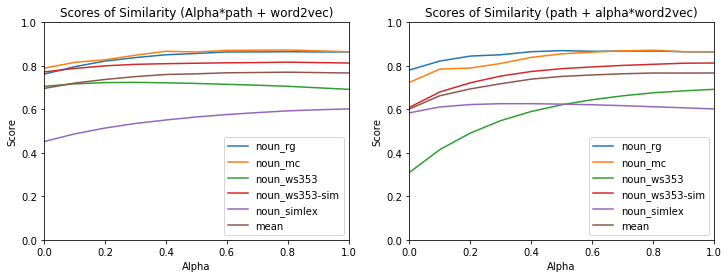

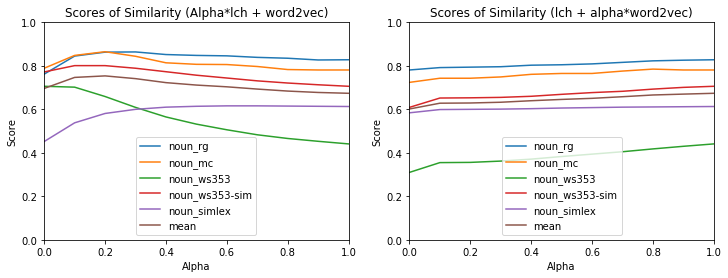

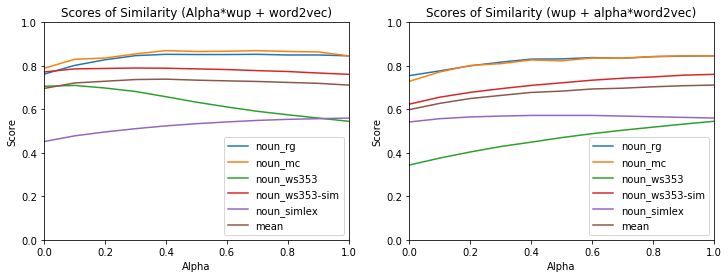

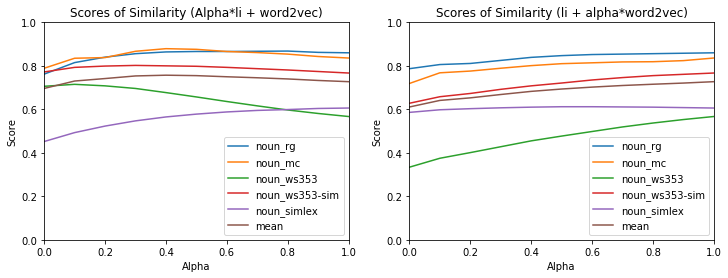

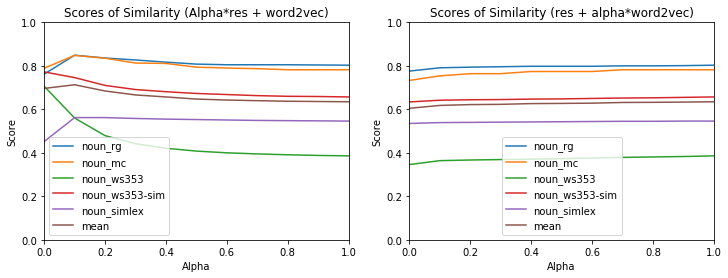

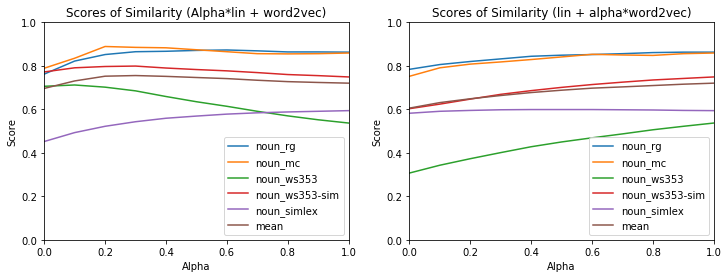

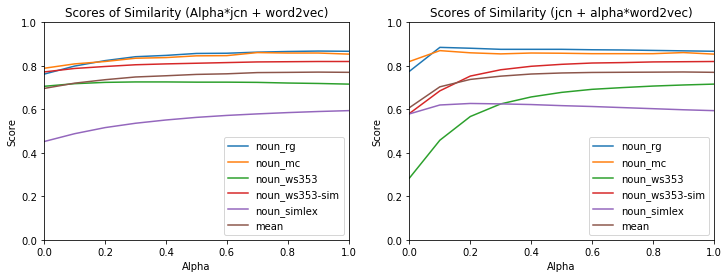

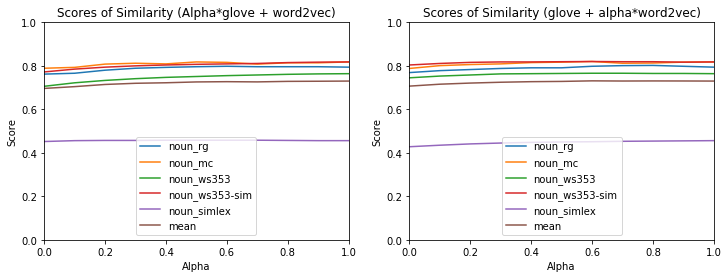

In [89]:
def calculate_composed_method(func):
    data = []
    alphas = []
    for alpha in range(11):
        alpha = alpha / 10
        my_method = {'composed': func(alpha)}
        d = [ws_eval.evaluate_multiple_metrics(my_method, dataset) for dataset in data_word_noun]
        d = [x['composed'] for x in d]
        data.append(d)
        alphas.append(alpha)
    df = pd.DataFrame(data, index=alphas, columns=data_word_noun)
    df['mean'] = df.mean(axis=1)
    return df

def combine(model_a, model_b):
    df = calculate_composed_method(lambda alpha: lambda x, y: alpha*model_a(x, y) + model_b(x,y))
    return df


def plot_chosen(chosen):
    info = []
    chosen_model = eval(chosen)
    for name, model in methods.items():
        if name == chosen:
            continue
            
        # ====================
        # Left * alpha
        df_l = combine(model, chosen_model)
        info.append(['alpha*{0} + {1}'.format(name, chosen), df_l['mean'].max()]) 
        # plot
        fig = plt.figure(figsize=(12, 4))
        ax = plt.subplot(121)
        plt.ylim(0, 1)
        df_l.plot(title='Scores of Similarity (Alpha*{0} + {1})'.format(name, chosen), ax=ax)
        plt.xlabel('Alpha')
        plt.ylabel('Score')
        
        # ===================
        # Right * alpha
        df_r = combine(chosen_model, model)
        info.append(['{0} + alpha*{1}'.format(name, chosen), df_r['mean'].max()]) 
        # plot
        ax = plt.subplot(122)
        plt.ylim(0, 1)
        df_r.plot(title='Scores of Similarity ({0} + alpha*{1})'.format(name, chosen), ax=ax)
        plt.xlabel('Alpha')
        plt.ylabel('Score')

    info = pd.DataFrame(info, columns=['description', 'mean_score']) 
    return info

plot_chosen('word2vec')

#### Baseline semantic similarity metrics on Word Graph Datasets

In [15]:
res_graph = lambda x, y: yagosim.word_similarity(x, y, 'res_graph')
methods['res_graph'] = res_graph
cor_dicts = [ws_eval.evaluate_multiple_metrics(methods, dataset) for dataset in data_word_graph]
baseline_cors_matrix = [[cors[m] for _, cors in enumerate(cor_dicts)] for m in sim_methods_graph[0:8]]
df_baselines_graph = pd.DataFrame(baseline_cors_matrix, index=sim_methods_graph[0:8], columns=data_word_graph)
display(df_baselines_graph)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


,graph_rg,graph_mc,graph_ws353,graph_ws353-sim,graph_simlex
path,0.782,0.699,0.331,0.602,0.581
lch,0.782,0.699,0.331,0.602,0.581
wup,0.738,0.711,0.362,0.612,0.537
li,0.779,0.696,0.349,0.615,0.583
res,0.765,0.713,0.363,0.622,0.530
res_graph,0.723,0.717,0.310,0.540,0.366
lin,0.776,0.736,0.320,0.589,0.578
jcn,0.762,0.794,0.301,0.578,0.576


#### Baseline semantic similarity metrics on Word Type Datasets

In [16]:
lin_graph = lambda x, y: yagosim.word_similarity(x, y, 'lin_graph')
jcn_graph = lambda x, y: yagosim.word_similarity(x, y, 'jcn_graph')
methods['lin_graph'] = lin_graph
methods['jcn_graph'] = jcn_graph
cor_dicts = [ws_eval.evaluate_multiple_metrics(methods, dataset) for dataset in data_word_type]
baseline_cors_matrix = [[cors[m] for _, cors in enumerate(cor_dicts)] for m in sim_methods_type[0:10]]
df_baselines_type = pd.DataFrame(baseline_cors_matrix, index=sim_methods_type[0:10], columns=data_word_type)
display(df_baselines_type)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


,type_rg,type_mc,type_ws353,type_ws353-sim,type_simlex
path,0.679,0.621,0.353,0.601,0.616
lch,0.679,0.621,0.353,0.601,0.616
wup,0.613,0.606,0.357,0.589,0.538
li,0.673,0.614,0.361,0.612,0.612
res,0.667,0.679,0.355,0.595,0.540
res_graph,0.676,0.704,0.294,0.490,0.387
lin,0.642,0.696,0.321,0.539,0.592
lin_graph,0.627,0.661,0.324,0.547,0.527
jcn,0.676,0.805,0.340,0.546,0.594
jcn_graph,-0.367,-0.324,-0.211,-0.372,-0.334


#### Steiger's Z Significance Test on Word Noun Dataset

In [17]:
wpath_rg = lambda x, y: wns.word_similarity_wpath(x, y, 0.9)
wpath_mc = lambda x, y: wns.word_similarity_wpath(x, y, 0.4)
wpath_ws353 = lambda x, y: wns.word_similarity_wpath(x, y, 0.5)
wpath_ws353sim = lambda x, y: wns.word_similarity_wpath(x, y, 0.8)
wpath_simlex = lambda x, y: wns.word_similarity_wpath(x, y, 0.8)

methods = {'wpath_rg':wpath_rg, 'wpath_mc':wpath_mc, 'wpath_ws353':wpath_ws353, 
           'wpath_ws353sim':wpath_ws353sim,'wpath_simlex':wpath_simlex}

cor_dicts = [ws_eval.evaluate_multiple_metrics(methods, dataset) for dataset in data_word_noun]

In [18]:
wpath_dic = {'noun_rg':'wpath_rg', 'noun_mc':'wpath_mc', 'noun_ws353':'wpath_ws353',
            'noun_ws353-sim':'wpath_ws353sim', 'noun_simlex':'wpath_simlex'}

cors_matrix = [[cor_dicts[i][wpath_dic[dataset]] for i, dataset in enumerate(data_word_noun)]]
df_cors = pd.DataFrame(cors_matrix, index=['metrics'], columns=data_word_noun)
display(df_cors)

,noun_rg,noun_mc,noun_ws353,noun_ws353-sim,noun_simlex
metrics,0.795,0.74,0.347,0.645,0.603


To perform the Steiger's Z Significance Test, one can use the implementation integrated in Sematch framework, or use the R, cocor package. The example scripts using cocor package to perform statistical test in Simlex dataset is shown as:
```
require(cocor) # load package
#j means dependent sample, k and h means comparison sample
#we have wpath with human (jk), jcn with human (jh), and wpath with jcn (kh)
#simlex
#wpath with path Pass
cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.584, r.kh=+0.955, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
#wpath with lch Pass
cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.584, r.kh=+0.955, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
#wpath with wup Pass
cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.542, r.kh=+0.946, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
#wpath with li Pass
 cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.586, r.kh=+0.965, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
#wpath with res Pass
cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.535, r.kh=+0.913, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
#wpath with lin Pass
cocor.dep.groups.overlap(r.jk=+0.603, r.jh=+0.582, r.kh=+0.944, n=666, alternative="greater", alpha=0.05, conf.level=0.95, null.value=0)
```
The example of using the integrated Statistical Test is illustrate in the following codes.

In [19]:
stats_tests = []
for _, dataset in enumerate(data_word_noun):
    stats = {}
    for _, m in enumerate(sim_methods_noun[0:7]):
        cor, p_value = ws_eval.statistical_test(wpath_dic[dataset], m, dataset)
        stats[m] = '('+str(round(cor,3))+','+str(p_value)+')'
    stats_tests.append(stats)
stats_matrix = [[cors[m] for _, cors in enumerate(stats_tests)] for _, m in enumerate(sim_methods_noun[0:7])]
df_stats = pd.DataFrame(stats_matrix, index=sim_methods_noun[0:7], columns=data_word_noun)
display(df_stats)

,noun_rg,noun_mc,noun_ws353,noun_ws353-sim,noun_simlex
path,"(0.988,0.12237761609)","(0.948,0.351528419054)","(0.922,0.0321679269393)","(0.959,0.0107682312797)","(0.955,0.0206179473294)"
lch,"(0.988,0.12237761609)","(0.948,0.351528419054)","(0.922,0.0321679269393)","(0.959,0.0107682312797)","(0.955,0.0206179473294)"
wup,"(0.956,0.0425083374454)","(0.931,0.409258605134)","(0.956,0.420612449275)","(0.958,0.0917875911784)","(0.946,1.38934863614e-09)"
li,"(0.984,0.281665699419)","(0.948,0.308981784008)","(0.95,0.208040059233)","(0.973,0.0897631401424)","(0.965,0.0192252476075)"
res,"(0.939,0.239356192156)","(0.972,0.410158670791)","(0.984,0.455938513267)","(0.948,0.264502694351)","(0.913,9.47692808673e-08)"
lin,"(0.942,0.336047605166)","(0.976,0.334545281366)","(0.916,0.0270064898595)","(0.899,0.0431967198107)","(0.944,0.0215151648688)"
jcn,"(0.866,0.302109070882)","(0.901,0.057509130222)","(0.818,0.0197407219215)","(0.843,0.0181782667967)","(0.916,0.0292250544495)"
